In [1]:
path = "frames/" #please update path to folder where frames are stored, as per your device

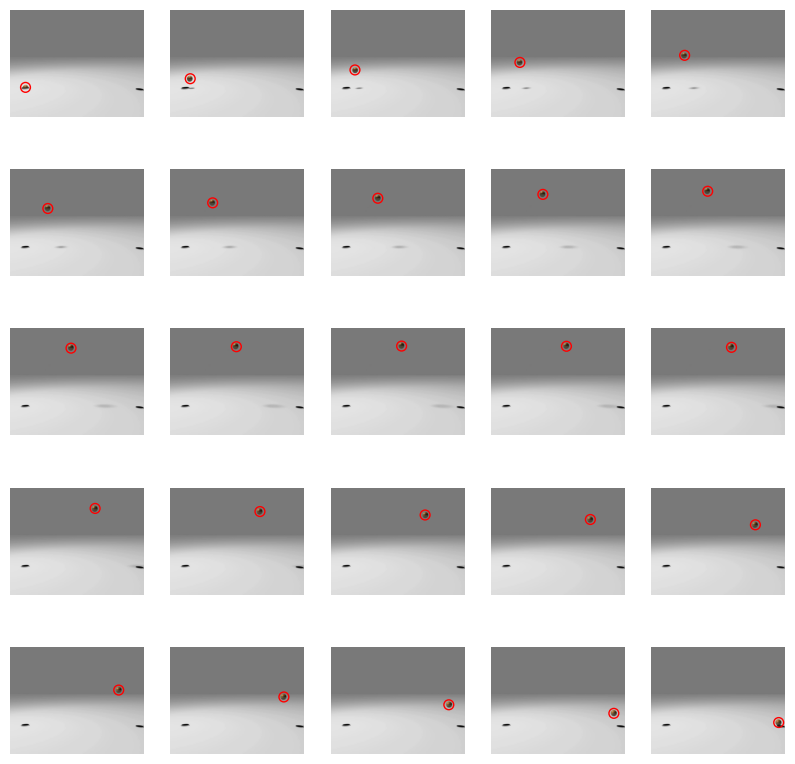

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('coordinates.csv', delimiter=',') #loading csv file

matrix1 = data.reshape((25, 2)) #creating 25 x 2 numpy matrix

fig, axs = plt.subplots(5, 5, figsize=(10, 10))

axis = axs.flatten() #converting to 1d
for i in range(len(matrix1)):
    x, y = matrix1[i] #pick coordinates

    frame = plt.imread(path+"frame"+ str(i + 1) + ".png" ) #iterate over frames

    axis[i].imshow(frame) #display frame
    
    axis[i].scatter(x, y, s=50, edgecolors='red', facecolors='none', linewidth=1) #draw coordinates

    axis[i].axis('off') #hide axes

plt.show() #displaying

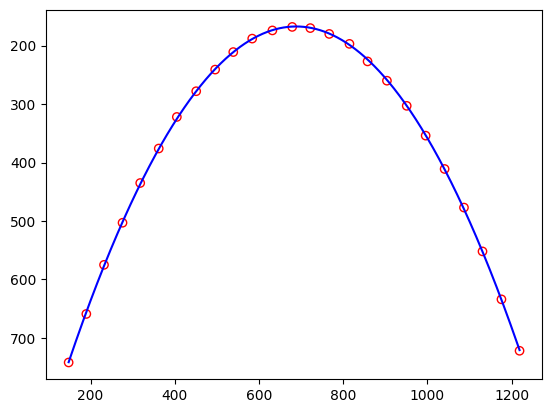

In [3]:
from numpy.linalg import inv

x = matrix1[:, 0]
y = matrix1[:, 1]

X = np.stack((np.square(x), x, np.ones_like(x)), axis=1) # least-squares estimation 
u = inv(np.transpose(X)@X)@np.transpose(X)@y

xp = np.linspace(min(x), max(x), 1000) #generating denser sampling of x-coordinates
yp = u[0]* xp**2 + u[1]* xp + u[2] #generating corresponding y-coordinates using parabola

# plot data and least-squares fit
plt.scatter(x,y,facecolors='none', edgecolors='red') #original data
plt.plot(xp, yp, 'b-')  #second-order polynomial fit
plt.gca().invert_yaxis()  #Reversing the y-axis
plt.show()


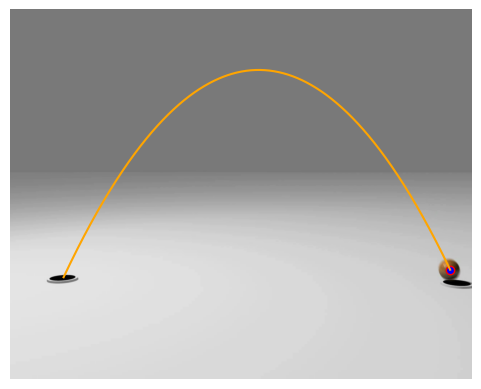

In [4]:
from IPython.display import clear_output

i = 1

while (i <= 25):
    plt.axis('off') #hide axes
    img = plt.imread(path + "frame" + str(i) +".png") #iterate through frames
    plt.imshow(img)
    x, y = matrix1[i-1] #pick coordinates
    
    plt.axis('off') #hide axes
    plt.scatter(x,y,facecolors='blue', edgecolors='red') #coordinates
    plt.plot(xp, yp, color='orange') #parabola
    
    i = i + 1
    
    plt.show() #display
    clear_output(wait=True) #clear screen

